## Day 13: Transparent Origami 

### Part 1

You reach another volcanically active part of the cave. It would be nice if you could do some kind of thermal imaging so you could tell ahead of time which caves are too hot to safely enter.

Fortunately, the submarine seems to be equipped with a thermal camera! When you activate it, you are greeted with:

Congratulations on your purchase! To activate this infrared thermal imaging
camera system, please enter the code found on page 1 of the manual.
Apparently, the Elves have never used this feature. To your surprise, you manage to find the manual; as you go to open it, page 1 falls out. It's a large sheet of transparent paper! The transparent paper is marked with random dots and includes instructions on how to fold it up (your puzzle input. For example:
```
6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5
```
The first section is a list of dots on the transparent paper. 0,0 represents the top-left coordinate. The first value, x, increases to the right. The second value, y, increases downward. So, the coordinate 3,0 is to the right of 0,0, and the coordinate 0,7 is below 0,0. The coordinates in this example form the following pattern, where # is a dot on the paper and . is an empty, unmarked position:
```
...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
...........
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........
```
Then, there is a list of fold instructions. Each instruction indicates a line on the transparent paper and wants you to fold the paper up (for horizontal y=... lines) or left (for vertical x=... lines). In this example, the first fold instruction is fold along y=7, which designates the line formed by all of the positions where y is 7 (marked here with -):
```
...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
-----------
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........
```
Because this is a horizontal line, fold the bottom half up. Some of the dots might end up overlapping after the fold is complete, but dots will never appear exactly on a fold line. The result of doing this fold looks like this:
```
#.##..#..#.
#...#......
......#...#
#...#......
.#.#..#.###
...........
...........
```
Now, only 17 dots are visible.

Notice, for example, the two dots in the bottom left corner before the transparent paper is folded; after the fold is complete, those dots appear in the top left corner (at 0,0 and 0,1). Because the paper is transparent, the dot just below them in the result (at 0,3) remains visible, as it can be seen through the transparent paper.

Also notice that some dots can end up overlapping; in this case, the dots merge together and become a single dot.

The second fold instruction is fold along x=5, which indicates this line:
```
#.##.|#..#.
#...#|.....
.....|#...#
#...#|.....
.#.#.|#.###
.....|.....
.....|.....
```
Because this is a vertical line, fold left:
```
#####
#...#
#...#
#...#
#####
.....
.....
```
The instructions made a square!

The transparent paper is pretty big, so for now, focus on just completing the first fold. After the first fold in the example above, 17 dots are visible - dots that end up overlapping after the fold is completed count as a single dot.

How many dots are visible after completing just the first fold instruction on your transparent paper?

In [1]:
import numpy as np
import re

coordinates = []
folds = []

def parse_numbers(input):
    return list(map(int, input))

for index, raw_line in enumerate(open("input13.txt", "r")):
    line = raw_line.strip()    

    if re.search(r'\d+,\d+', line):
        match = re.search(r'\d+,\d+', line)
        
        coordinates.append(parse_numbers(match[0].split(',')))

    elif re.search(r'[yx]=\d+', line):
        match = re.search(r'[yx]=\d+', line)
        
        axis, number = match[0].split('=')
        folds.append([axis, int(number)])

In [2]:
# create matrix and put given dots on it
 
max_columns = max(coordinates, key=lambda x: x[0])[0]
max_rows = max(coordinates, key=lambda x: x[1])[1]
matrix = np.zeros([max_rows+2, max_columns+1], dtype=int)

for coord in coordinates:
    matrix[coord[1], coord[0]] = 1

In [3]:
# vertical(y) fold

def y_fold(fold, matrix):    
    top_half = matrix[0:fold[1], :]
    bottom_half = matrix[fold[1]+1:matrix.shape[0], :]
    fliped_bottom = np.flip(bottom_half, 0)
    return top_half + fliped_bottom

# horizontal(x) fold

def x_fold(fold, matrix):
    left_half = matrix[:, 0:fold[1]]
    right_half = matrix[:, fold[1]+1:matrix.shape[1]]
    flipped_right = np.flip(right_half, 1)
    return left_half + flipped_right

In [4]:
result = np.count_nonzero(x_fold(folds[0], matrix) > 0)
print(f'Puzzle answer: {result}')

Puzzle answer: 708


### Part 2
Finish folding the transparent paper according to the instructions. The manual says the code is always eight capital letters.

What code do you use to activate the infrared thermal imaging camera system?

In [5]:
matrix_copy = matrix.copy()

for fold in folds:
    if fold[0] == 'x':
        matrix_copy = x_fold(fold, matrix_copy)
    else:
        matrix_copy = y_fold(fold, matrix_copy)
resulting_matrix = matrix_copy

In [6]:
# alternative solution with recursion
def fold_all(folds, matrix):
    if len(folds) == 0:
        return matrix

    fold = folds[0]

    if fold[0] == 'x':
        return fold_all(folds[1:], x_fold(fold, matrix))
    else:
        return fold_all(folds[1:], y_fold(fold, matrix))

fold_all(folds, matrix)

array([[ 4, 14, 15, 24,  0, 10, 11,  7,  0,  0, 15,  0,  0,  0,  0,  1,
         0,  0,  2,  0,  9,  9, 15,  0,  0, 15, 11,  5,  0,  0,  5,  3,
        10,  1,  0,  3,  0,  0,  4,  0],
       [30,  0,  0,  0,  0,  7,  0,  0,  6,  0, 12,  0,  0,  0,  0,  3,
         0,  0,  6,  0,  2,  0,  0,  1,  0,  7,  0,  0,  3,  0,  9,  0,
         0,  0,  0, 14,  0,  0, 10,  0],
       [ 4, 21,  5,  0,  0,  2,  1,  1,  0,  0, 11,  0,  0,  0,  0,  3,
         0,  0,  5,  0,  5,  2,  9,  0,  0,  5,  0,  0,  8,  0,  7, 14,
         2,  0,  0, 14,  6,  7,  7,  0],
       [ 4,  0,  0,  0,  0, 28,  0,  0,  9,  0, 14,  0,  0,  0,  0,  1,
         0,  0,  7,  0, 10,  0,  0, 16,  0, 10,  1,  7,  0,  0, 12,  0,
         0,  0,  0,  8,  0,  0,  8,  0],
       [14,  0,  0,  0,  0,  7,  0,  0,  5,  0,  9,  0,  0,  0,  0, 11,
         0,  0,  1,  0, 16,  0,  0, 22,  0,  6,  0,  5,  0,  0, 15,  0,
         0,  0,  0, 18,  0,  0, 25,  0],
       [ 2,  6,  5, 33,  0,  2,  4,  9,  0,  0,  3,  3,  3,  5,  0,  0,
   

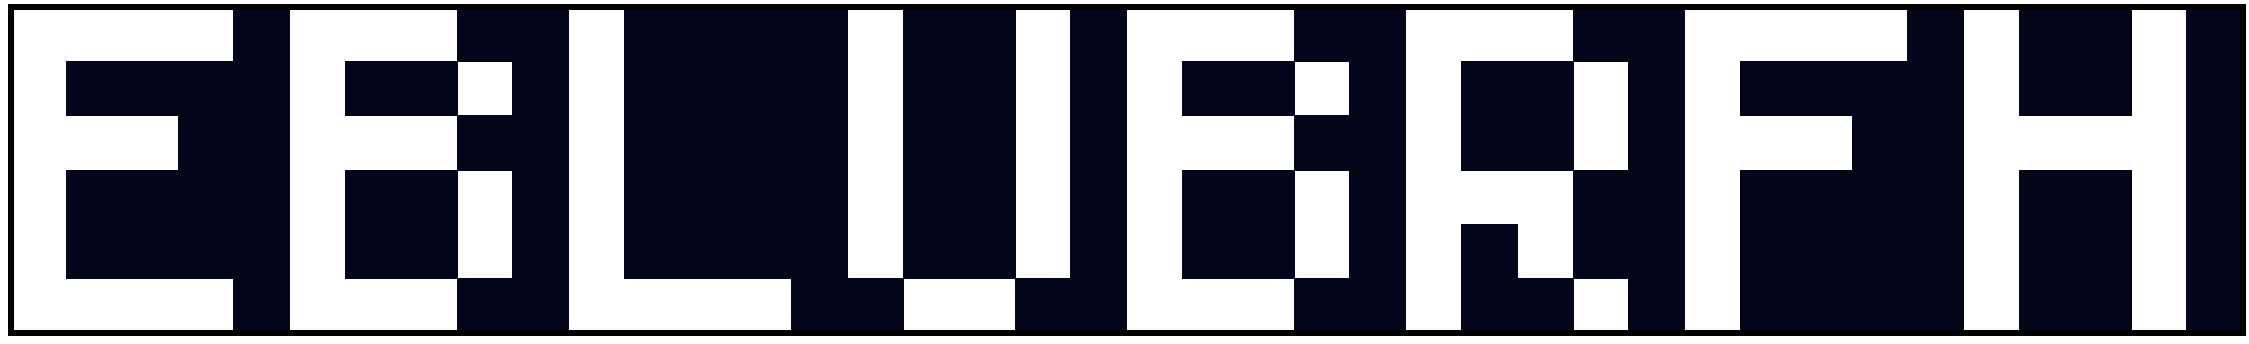

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

size = tuple(reversed(resulting_matrix.shape))

plt.figure(figsize=size)
ax = sns.heatmap(resulting_matrix, mask=resulting_matrix > 0, yticklabels=False, xticklabels=False, cbar=False)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(6)
plt.show()

Puzzle answer: EBLUBRFH